# Structure

- Imports
- Read and clean data: Load, drop irrelevant rows + columns, show data (head())
- Explore datasets: Static and interactive plots for each dataset
- Merge datasets
- Analysis: Summary statistics
- Conclusion: 


# Data

Indkomst vs. middellevetid i kommunerne

# Figurer
- Interaktive figurer på kommuneniveau
- Scatter plot af middellevetid vs. gennemsnitlig indkomst i kommunerne
- Husk at sortere regioner og landsdele fra

Indkomst:
https://www.statbank.dk/statbank5a/default.asp?w=1920


Livskvalitet:
https://www.statbank.dk/statbank5a/SelectVarVal/Define.asp?MainTable=LIVO1&PLanguage=0&PXSId=0&wsid=cftree

**Import packages**

In [157]:
import pandas as pd
import pydst
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib_venn import venn2
import ipywidgets as widgets

## Read data from DST

In [111]:
Dst = pydst.Dst(lang='en')

# a. Income dataset
income = Dst.get_data(table_id='INDKP105', variables={'OMRÅDE':['*'], 'ENHED':['118'], 'KOEN':['MOK'], 'ALDER1':['00'],
                                                     'INDKINTB':['000'], 'Tid':['*']})

# b. Life expectancy dataset
life = Dst.get_data(table_id='LIVO1', variables={'AKTP':['O1'], 'OMRÅDE':['*'], 'Tid':['*']})

In [119]:
income.head()

,municipality,year,income
3097,Aabenraa,1987,115880
2907,Aabenraa,1988,122373
2731,Aabenraa,1989,128413
2727,Aabenraa,1990,132820
2596,Aabenraa,1991,139228


In [120]:
life.head()

,municipality,year,life expectancy
70,Aabenraa,2008,78.2
174,Aabenraa,2009,78.5
278,Aabenraa,2010,78.5
382,Aabenraa,2011,78.8
486,Aabenraa,2012,79.1


## Clean data

**Rename variables**

In [112]:
# Make dictionary for renaming columns
# a. Income dataset
columns_dict = {}
columns_dict['OMRÅDE'] = 'municipality'
columns_dict['INDHOLD'] = 'income'
columns_dict['TID'] = 'year'

income.rename(columns = columns_dict, inplace = True)

# b. Life expectancy dataset
columns_dict_life = {}
columns_dict_life['OMRÅDE'] = 'municipality'
columns_dict_life['INDHOLD'] = 'life expectancy'
columns_dict_life['TID'] = 'year'

life.rename(columns = columns_dict_life, inplace = True)

**Drop irrelevant variables**

In [113]:
income.drop(['ENHED', 'KOEN', 'ALDER1', 'INDKINTB'], axis=1, inplace=True)
life.drop(['AKTP'], axis=1, inplace=True)

**Drop irrelevant observations**

In [114]:
# Drop all obsevations that is for regions, provinces, or all of Denmark
# a. Income dataset
I = income.municipality.str.contains('Region')
I |= income.municipality.str.contains('Province')
income = income.loc[I == False] 

# b. Life expectancy dataset
I = life.municipality.str.contains('Region')
I |= life.municipality.str.contains('Province')
life = life.loc[I == False] 

,municipality,year,life expectancy
0,All Denmark,2008,78.5
6,Copenhagen,2008,75.6
7,Frederiksberg,2008,78.0
8,Ballerup,2008,77.6
9,Brøndby,2008,77.4
10,Dragør,2008,80.3
11,Gentofte,2008,80.2
12,Gladsaxe,2008,77.9
13,Glostrup,2008,77.3
14,Herlev,2008,77.3


## Explore the two datasets

**Observations in the two datasets**

From the output below, we see that the two datasets have the same number of municipalities. Furthermore, we see that the income dataset has data from the years 1987-2018, where the life expectancy dataset only has data from the years 2008-2018. I.e. the life expectancy dataset is a subset of the income dataset, which is illustrated in the figure plotted below. 

Years in income dataset: [1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018]
Municipalities in income dataset = 99
Years in life expectancy dataset: [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
Municipalities in life expectancy dataset = 99


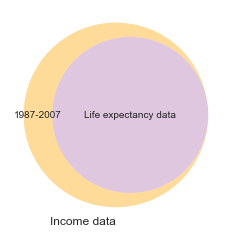

In [115]:
# a. Sort values by municipality and then year
income = income.sort_values(['municipality','year'])
life = life.sort_values(['municipality','year'])

# b. Print number of municipalities and years for each dataset
print(f'Years in income dataset: {income.year.unique()}')
print(f'Municipalities in income dataset = {len(income.municipality.unique())}')
print(f'Years in life expectancy dataset: {life.year.unique()}')
print(f'Municipalities in life expectancy dataset = {len(life.municipality.unique())}')

# c. Plot the overlap of datasets
plt.figure()
v = venn2(subsets = (4, 0, 10), set_labels = ('Income data', ''), set_colors=('orange', 'blue'))
v.get_label_by_id('100').set_text('1987-2007')
v.get_label_by_id('010').set_text('')
v.get_label_by_id('110').set_text('Life expectancy data')
plt.show()

**Plots of the two datasets**

The figures below show the development in the average income and life expectancy in all of Denmark over the years we have data for. We see that both the income and the life expectancy have been increasing over the periods. The average income had a small drop around 2008-2009, which was expected as this is the years of the financial crisis. The average life expectancy had a sharp increase in 2014, which we are not able to explain. 

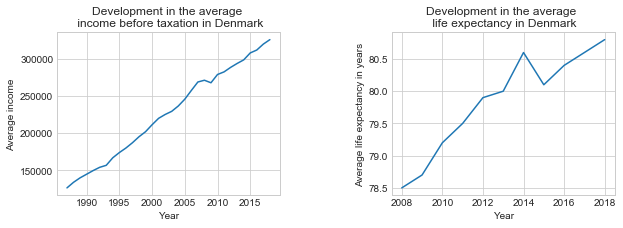

In [155]:
# a. Start static figure with two subplots
f = plt.figure(figsize=(10,3))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

f.subplots_adjust(wspace=0.5, hspace=1)

# b. Add first subplot of average income 
I = income['municipality']=='All Denmark'
avg_income = income.loc[I, 'income']
avg_income = avg_income.astype('float')
year = income.loc[I, 'year']
year = year.astype('float')

ax1.plot(year, avg_income)
ax1.legend('')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average income')
ax1.set_title('Development in the average \n income before taxation in Denmark')

# c. Add second subplot of average life expectancy
I = life['municipality']=='All Denmark'
year = life.loc[I, 'year']
year = year.astype('float')
avg_life = life.loc[I, 'life expectancy']
avg_life = avg_life.astype('float')

ax2.plot(year, avg_life)
ax2.legend('')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average life expectancy in years')
ax2.set_title('Development in the average \n life expectancy in Denmark')

# d. Show figure
plt.show()

# e. Delete observations for all of Denmark, as we are not using them in the assignment from now on
I = income.municipality.str.contains('All Denmark')
income = income.loc[I == False] 

I = life.municipality.str.contains('All Denmark')
income = life.loc[I == False] 

In [178]:
# a. Start interactive figure for income data
def static_plot(dataframe, variable):
    '''Plots varaible from dataframe for all years available as a static plot.
    
    Parameters
    ----------
    dataframe: DataFrame to choose variable from
    
    variable: Variable to use as y in plot
    '''
    
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    
    # Convert year and variable to numeric
    dataframe.loc[:,['year']] = pd.to_numeric(dataframe['year'])
    dataframe.loc[:,[variable]] = pd.to_numeric(dataframe[variable])
    
    # Make static plot    
    x = dataframe.loc[:,'year']
    y = dataframe.loc[:,variable]
    ax.plot(x,y) 

def interactive_plot(dataframe):
    '''Plots static plot from static_plot() as an interactive figure with drop-down menu to choose between municipalities.
    
    Parameters
    ----------
    dataframe: DataFrame to choose variable from
    '''
    
    # Make list of municipalities
    list = []
    for i in income.municipality.unique():
        list.append(i)
    
    widgets.interact(static_plot, dataframe = widgets.fixed(dataframe), 
                     variable = widgets.Dropdown(description='Municipality', options=list, value='Aabenraa'));

In [179]:
#static_plot(income, 'income')

interactive_plot(dataframe=income)

TraitError: Invalid selection: value not found

<br>
<br>
<br>
<br>
<br>

**Kode brugt til at løse opgaver, der ikke skal med i endelig aflevering**

In [59]:
pd.set_option('display.max_colwidth', -1)

In [45]:
tables = Dst.get_tables(subjects=['05'])
tables[tables.id == 'LIVO1']
var = Dst.get_variables(table_id='LIVO1')
var

,id,text,elimination,time,values,map
0,AKTP,key figures,False,False,"[{'id': 'O1', 'text': 'Life expectancy (years)'}, {'id': 'O2', 'text': 'General medical treatment, 30-59-year-olds (per inhabitant)'}, {'id': 'O3', 'text': 'Reported household burglaries (per 1,000 inhabitants)'}, {'id': 'O4', 'text': 'Reported crimes of violence (per 1,000 inhabitants)'}, {'id': 'O5', 'text': 'Victims of reported criminal offences (per 1,000 inhabitants)'}, {'id': 'O6', 'text': 'Education qualifying for the labour market, 30-59-year-olds (per cent) '}, {'id': 'O7', 'text': 'Employment rate, 30-59-year-olds (per cent)'}, {'id': 'O8', 'text': 'Long-term unemployment, 30-59-year-olds (per 1,000 in the labour force)'}, {'id': 'O9', 'text': 'Personal disposable income (median DKK/year)'}, {'id': 'O10', 'text': 'Low income in 3 consecutive years. (Excluding students pr. 1.000 inhabitants)'}, {'id': 'O11', 'text': 'Divorces (per 1,000 married)'}, {'id': 'O12', 'text': 'Dissolved families with children (per 100 families with children)'}, {'id': 'O13', 'text': 'Square meters dwelling area (per person) '}, {'id': 'O14', 'text': 'Electoral participation at the last general election (per cent)'}, {'id': 'O15', 'text': 'Electoral participation at the last municipal election (per cent)'}]",NaN
1,OMRÅDE,region,True,False,"[{'id': '000', 'text': 'All Denmark'}, {'id': '084', 'text': 'Region Hovedstaden'}, {'id': '101', 'text': 'Copenhagen'}, {'id': '147', 'text': 'Frederiksberg'}, {'id': '155', 'text': 'Dragør'}, {'id': '185', 'text': 'Tårnby'}, {'id': '165', 'text': 'Albertslund'}, {'id': '151', 'text': 'Ballerup'}, {'id': '153', 'text': 'Brøndby'}, {'id': '157', 'text': 'Gentofte'}, {'id': '159', 'text': 'Gladsaxe'}, {'id': '161', 'text': 'Glostrup'}, {'id': '163', 'text': 'Herlev'}, {'id': '167', 'text': 'Hvidovre'}, {'id': '169', 'text': 'Høje-Taastrup'}, {'id': '183', 'text': 'Ishøj'}, {'id': '173', 'text': 'Lyngby-Taarbæk'}, {'id': '175', 'text': 'Rødovre'}, {'id': '187', 'text': 'Vallensbæk'}, {'id': '201', 'text': 'Allerød'}, {'id': '240', 'text': 'Egedal'}, {'id': '210', 'text': 'Fredensborg'}, {'id': '250', 'text': 'Frederikssund'}, {'id': '190', 'text': 'Furesø'}, {'id': '270', 'text': 'Gribskov'}, {'id': '260', 'text': 'Halsnæs'}, {'id': '217', 'text': 'Helsingør'}, {'id': '219', 'text': 'Hillerød'}, {'id': '223', 'text': 'Hørsholm'}, {'id': '230', 'text': 'Rudersdal'}, {'id': '400', 'text': 'Bornholm'}, {'id': '085', 'text': 'Region Sjælland'}, {'id': '253', 'text': 'Greve'}, {'id': '259', 'text': 'Køge'}, {'id': '350', 'text': 'Lejre'}, {'id': '265', 'text': 'Roskilde'}, {'id': '269', 'text': 'Solrød'}, {'id': '320', 'text': 'Faxe'}, {'id': '376', 'text': 'Guldborgsund'}, {'id': '316', 'text': 'Holbæk'}, {'id': '326', 'text': 'Kalundborg'}, {'id': '360', 'text': 'Lolland'}, {'id': '370', 'text': 'Næstved'}, {'id': '306', 'text': 'Odsherred'}, {'id': '329', 'text': 'Ringsted'}, {'id': '330', 'text': 'Slagelse'}, {'id': '340', 'text': 'Sorø'}, {'id': '336', 'text': 'Stevns'}, {'id': '390', 'text': 'Vordingborg'}, {'id': '083', 'text': 'Region Syddanmark'}, {'id': '420', 'text': 'Assens'}, {'id': '430', 'text': 'Faaborg-Midtfyn'}, {'id': '440', 'text': 'Kerteminde'}, {'id': '482', 'text': 'Langeland'}, {'id': '410', 'text': 'Middelfart'}, {'id': '480', 'text': 'Nordfyns'}, {'id': '450', 'text': 'Nyborg'}, {'id': '461', 'text': 'Odense'}, {'id': '479', 'text': 'Svendborg'}, {'id': '492', 'text': 'Ærø'}, {'id': '530', 'text': 'Billund'}, {'id': '561', 'text': 'Esbjerg'}, {'id': '563', 'text': 'Fanø'}, {'id': '607', 'text': 'Fredericia'}, {'id': '510', 'text': 'Haderslev'}, {'id': '621', 'text': 'Kolding'}, {'id': '540', 'text': 'Sønderborg'}, {'id': '550', 'text': 'Tønder'}, {'id': '573', 'text': 'Varde'}, {'id': '575', 'text': 'Vejen'}, {'id': '630', 'text': 'Vejle'}, {'id': '580', 'text': 'Aabenraa'}, {'id': '082', 'text': 'Region Midtjylland'}, {'id': '710', 'text': 'Favrskov'}, {'id': '766', 'text': 'Hedensted'}, {'id': '615', 'text': 'Horsens'

In [60]:
tables = Dst.get_tables(subjects=['04'])
tables[tables.id == 'INDKP105']
var = Dst.get_variables(table_id='INDKP105')
var

,id,text,elimination,time,map,values
0,OMRÅDE,region,True,False,denmark_municipality_07,"[{'id': '000', 'text': 'All Denmark'}, {'id': '01', 'text': 'Province Byen København'}, {'id': '101', 'text': 'Copenhagen'}, {'id': '147', 'text': 'Frederiksberg'}, {'id': '155', 'text': 'Dragør'}, {'id': '185', 'text': 'Tårnby'}, {'id': '02', 'text': 'Province Københavns omegn'}, {'id': '165', 'text': 'Albertslund'}, {'id': '151', 'text': 'Ballerup'}, {'id': '153', 'text': 'Brøndby'}, {'id': '157', 'text': 'Gentofte'}, {'id': '159', 'text': 'Gladsaxe'}, {'id': '161', 'text': 'Glostrup'}, {'id': '163', 'text': 'Herlev'}, {'id': '167', 'text': 'Hvidovre'}, {'id': '169', 'text': 'Høje-Taastrup'}, {'id': '183', 'text': 'Ishøj'}, {'id': '173', 'text': 'Lyngby-Taarbæk'}, {'id': '175', 'text': 'Rødovre'}, {'id': '187', 'text': 'Vallensbæk'}, {'id': '03', 'text': 'Province Nordsjælland'}, {'id': '201', 'text': 'Allerød'}, {'id': '240', 'text': 'Egedal'}, {'id': '210', 'text': 'Fredensborg'}, {'id': '250', 'text': 'Frederikssund'}, {'id': '190', 'text': 'Furesø'}, {'id': '270', 'text': 'Gribskov'}, {'id': '260', 'text': 'Halsnæs'}, {'id': '217', 'text': 'Helsingør'}, {'id': '219', 'text': 'Hillerød'}, {'id': '223', 'text': 'Hørsholm'}, {'id': '230', 'text': 'Rudersdal'}, {'id': '04', 'text': 'Province Bornholm'}, {'id': '400', 'text': 'Bornholm'}, {'id': '05', 'text': 'Province Østsjælland'}, {'id': '253', 'text': 'Greve'}, {'id': '259', 'text': 'Køge'}, {'id': '350', 'text': 'Lejre'}, {'id': '265', 'text': 'Roskilde'}, {'id': '269', 'text': 'Solrød'}, {'id': '06', 'text': 'Province Vest- og Sydsjælland'}, {'id': '320', 'text': 'Faxe'}, {'id': '376', 'text': 'Guldborgsund'}, {'id': '316', 'text': 'Holbæk'}, {'id': '326', 'text': 'Kalundborg'}, {'id': '360', 'text': 'Lolland'}, {'id': '370', 'text': 'Næstved'}, {'id': '306', 'text': 'Odsherred'}, {'id': '329', 'text': 'Ringsted'}, {'id': '330', 'text': 'Slagelse'}, {'id': '340', 'text': 'Sorø'}, {'id': '336', 'text': 'Stevns'}, {'id': '390', 'text': 'Vordingborg'}, {'id': '07', 'text': 'Province Fyn'}, {'id': '420', 'text': 'Assens'}, {'id': '430', 'text': 'Faaborg-Midtfyn'}, {'id': '440', 'text': 'Kerteminde'}, {'id': '482', 'text': 'Langeland'}, {'id': '410', 'text': 'Middelfart'}, {'id': '480', 'text': 'Nordfyns'}, {'id': '450', 'text': 'Nyborg'}, {'id': '461', 'text': 'Odense'}, {'id': '479', 'text': 'Svendborg'}, {'id': '492', 'text': 'Ærø'}, {'id': '08', 'text': 'Province Sydjylland'}, {'id': '530', 'text': 'Billund'}, {'id': '561', 'text': 'Esbjerg'}, {'id': '563', 'text': 'Fanø'}, {'id': '607', 'text': 'Fredericia'}, {'id': '510', 'text': 'Haderslev'}, {'id': '621', 'text': 'Kolding'}, {'id': '540', 'text': 'Sønderborg'}, {'id': '550', 'text': 'Tønder'}, {'id': '573', 'text': 'Varde'}, {'id': '575', 'text': 'Vejen'}, {'id': '630', 'text': 'Vejle'}, {'id': '580', 'text': 'Aabenraa'}, {'id': '09', 'text': 'Province Østjylland'}, {'id': '710', 'text': 'Favrskov'}, {'id': '766', 'text': 'Hedensted'}, {'id': '615', 'text': 'Horsens'}, {'id': '707', 'text': 'Norddjurs'}, {'id': '727', 'text': 'Odder'}, {'id': '730', 'text': 'Randers'}, {'id': '741', 'text': 'Samsø'}, {'id': '740', 'text': 'Silkeborg'}, {'id': '746', 'text': 'Skanderborg'}, {'id': '706', 'text': 'Syddjurs'}, {'id': '751', 'text': 'Aarhus'}, {'id': '10', 'text': 'Province Vestjylland'}, {'id': '657', 'text': 'Herning'}, {'id': '661', 'text': 'Holstebro'}, {'id': '756', 'text': 'Ikast-Brande'}, {'id': '665', 'text': 'Lemvig'}, {'id': '760', 'text': 'Ringkøbing-Skjern'}, {'id': '779', 'text': 'Skive'}, {'id': '671', 'text': 'Struer'}, {'id': '791', 'text': 'Viborg'}, {'id': '11', 'text': 'Province Nordjylland'}, {'id': '810', 'text': 'Brønderslev'}, ...]"
1,ENHED,unit,False,False,NaN,"[{'id': '103', 'text': 'Persons in the group (number)'}, {'id': '110', 'text': 'Amount of income (DKK 1.000)'}, {'id': '118', 'text': 'Average income for persons in the group (DKK)'}]"
2,KOEN,sex,True,False,NaN,"[{'id': 'MOK', 'text': 'Men and women, to

In [48]:
pd.reset_option('display.max_colwidth')

In [41]:
tables

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,LIGEDI0,Gender equality indicator of nominated and ele...,-,2019-06-26 08:00:00,1918,2019,True,"[candidates, indicator, time]"
1,LIGEDI1,Gender equality indicator on nominated and ele...,-,2019-06-26 08:00:00,2001,2019,True,"[candidates, indicator, age, time]"
2,LIGEDI2,Gender equality indicator of nominated and ele...,-,2018-03-16 08:00:00,2005,2017,True,"[candidates, indicator, age, municipality, time]"
3,LIGEDI3,Gender equality indicator of nominated and ele...,-,2018-03-16 08:00:00,2005,2017,True,"[candidates, indicator, time]"
4,LIGEDI4,Gender equality indicator of nominated and ele...,-,2019-06-26 08:00:00,1994,2019,True,"[candidates, indicator, time]"
...,...,...,...,...,...,...,...,...
471,STRAF70,Arrests,number,2019-06-06 08:00:00,2015,2018,True,"[sex, type of offence, outcome, age, time]"
472,STRAF71,Arrests,number,2019-06-06 08:00:00,2015,2018,True,"[sex, age, residence in Denmark, time]"
473,STRAF72,Arrests,number,2019-06-06 08:00:00,2015,2018,True,"[residence in Denmark, type of offence, time]"
474,STRAF73,Arrests,number,2019-06-06 08:00:00,2015,2018,True,"[sex, age, education, time]"


In [39]:
income.head()

,OMRÅDE,ENHED,KOEN,ALDER1,INDKINTB,TID,INDHOLD
0,Ærø,Average income for persons in the group (DKK),"Men and women, total",Total,"Under 25,000 DKK",2013,-41684
1,Ærø,Average income for persons in the group (DKK),"Men and women, total",Total,"25,000 - 49,999 DKK",2013,37312
2,Ærø,Average income for persons in the group (DKK),"Men and women, total",Total,"50,000 - 74,999 DKK",2013,63641
3,Ærø,Average income for persons in the group (DKK),"Men and women, total",Total,"75,000 - 99,999 DKK",2013,87294
4,Ærø,Average income for persons in the group (DKK),"Men and women, total",Total,"100,000 - 124,999 DKK",2013,113894
